# Application to real turbine NREL 5MW and IEA 15MW

## Imports

In [1]:
import sys
import os
import numpy as np
from scipy.integrate import solve_ivp
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
from droplet_impact import utils as ut, config as cfg

## Data imports

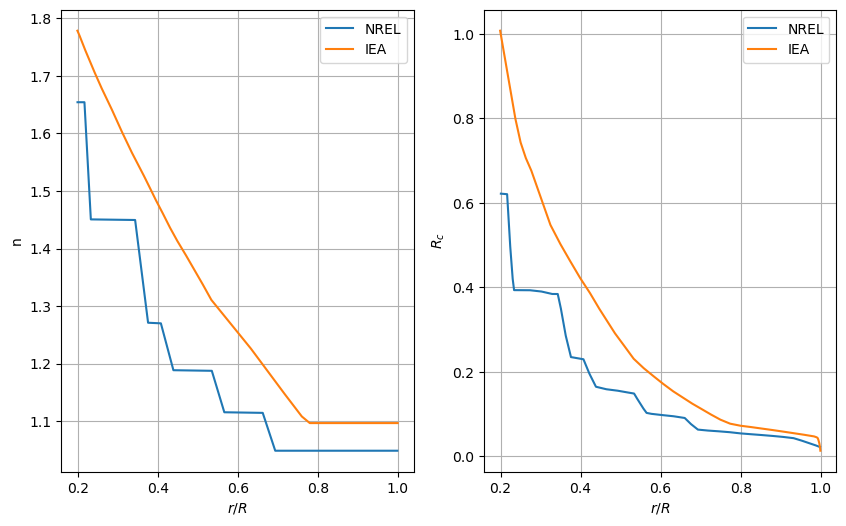

In [2]:
points_n_nrel = [
    [0.19858261842596042, 1.6543080939947783],
    [0.21589863574197776, 1.6543080939947783],
    [0.23192386377764967, 1.4506527415143604],
    [0.3427486351768336, 1.4496083550913839],
    [0.3751698258225673, 1.271018276762402],
    [0.4072067184338725, 1.2699738903394255],
    [0.4385518745832062, 1.1885117493472586],
    [0.5346580312637754, 1.187467362924282],
    [0.5659828422230512, 1.1154046997389035],
    [0.6620889989036204, 1.114360313315927],
    [0.6934002464028576, 1.0485639686684072],
    [0.9990279520305632, 1.0485639686684072]
]

points_n_iea = [
    [0.1983136098018604, 1.7785900783289819],
    [0.2035264996100505, 1.77023498694517],
    [0.21830162874549297, 1.7441253263707575],
    [0.24176189345902138, 1.7054830287206268],
    [0.25913668576853954, 1.6783289817232379],
    [0.2843240310603235, 1.6417754569190601],
    [0.30951589750545366, 1.6031331592689297],
    [0.33470324279723757, 1.566579634464752],
    [0.3650944355905192, 1.5258485639686685],
    [0.38072632328507, 1.5039164490861618],
    [0.39549014953714695, 1.483028720626632],
    [0.41198783809749867, 1.4610966057441255],
    [0.4302239101194715, 1.4360313315926894],
    [0.448455460988098, 1.4130548302872064],
    [0.4701547364732743, 1.3879895561357702],
    [0.4875159653227539, 1.3671018276762403],
    [0.5118216857120252, 1.3378590078328982],
    [0.5335254823505478, 1.3107049608355092],
    [0.6324098877623684, 1.2261096605744126],
    [0.7174301764380095, 1.1467362924281983],
    [0.759938060199157, 1.108093994778068],
    [0.779876346455981, 1.0966057441253263],
    [0.8474088139884486, 1.0966057441253263],
    [0.916672883252518, 1.0966057441253263],
    [0.999789766369401, 1.0966057441253263]
]

points_rc_iea = [
    [0.1989781588454875, 1.0072730982761422],
    [0.2371247614437007, 0.7986456658252736],
    [0.2501278301679196, 0.7427587894726373],
    [0.26312609775907114, 0.7059318448244676],
    [0.2769885693023553, 0.6757894187757365],
    [0.32465421839554137, 0.5474756806929585],
    [0.3497817484926442, 0.5017443060217907],
    [0.3731760695524144, 0.4631845938735316],
    [0.39917100435702824, 0.4214290711899564],
    [0.4234327301243094, 0.3862325833072669],
    [0.44683185231714684, 0.3488986177272438],
    [0.48583305660135795, 0.2909929178328557],
    [0.5092337791718846, 0.26097104315990055],
    [0.5326377024977895, 0.2306860582999048],
    [0.5577684333502707, 0.2083809882618082],
    [0.5820317594952409, 0.18960163302586247],
    [0.6062966860179003, 0.17127170299881303],
    [0.6314290172480707, 0.1535967135413591],
    [0.65569394377073, 0.1387475955951343],
    [0.6790946663412566, 0.12443294162639547],
    [0.7024953889117832, 0.11159513716532418],
    [0.7258993122376881, 0.09864482283703976],
    [0.7493048359412822, 0.0865690967734251],
    [0.7735729632193198, 0.07707713323138715],
    [0.7995614965131772, 0.0721867832471692],
    [0.8255452286739671, 0.06908935506098773],
    [0.8515305612124462, 0.06564840065088566],
    [0.8801149071180799, 0.06192647097859437],
    [0.9052360357044263, 0.05841921309163883],
    [0.9312245689982837, 0.054712661150182085],
    [0.9580805069996521, 0.05087128871219534],
    [0.9832064367190659, 0.0469602929839554],
    [0.9884092645864425, 0.0452884882871698],
    [0.9918804837941756, 0.04367756773035896],
    [0.9936312969860888, 0.04004604198427972],
    [0.9962847231946741, 0.031090226499526207],
    [0.9980995514941527, 0.02134555887174696],
    [0.9990741815068357, 0.01305422122296893]
]

points_rc_nrel = [
    [0.20082019356568148, 0.6215661483217255],
    [0.21640147074709631, 0.6203002537908704],
    [0.224243321423856, 0.49566381183840513],
    [0.23034076041945895, 0.4196715826523095],
    [0.23381838113794856, 0.39320445827625267],
    [0.2459396417554543, 0.3931183067879407],
    [0.2736453803097531, 0.39292145997455835],
    [0.3022185235715629, 0.38988901063746956],
    [0.32906165855141817, 0.3841045015553399],
    [0.3429145278285675, 0.3840083228563938],
    [0.3507275717069228, 0.34950530298188615],
    [0.3628936428997243, 0.2853818499646837],
    [0.3759239180446586, 0.23471052692770314],
    [0.4070976750513121, 0.22954431741838688],
    [0.42185155696744436, 0.19573178602368424],
    [0.4383402482985985, 0.16449840893787915],
    [0.46432238008169924, 0.15858261997434747],
    [0.49289872409888735, 0.15509934313451457],
    [0.5197450598341209, 0.1506043394658129],
    [0.5336011298666485, 0.14840476669031535],
    [0.5414125733673147, 0.13605090048469637],
    [0.5570386611240253, 0.11270097815525722],
    [0.5648517050023806, 0.10257483281485663],
    [0.5769777667529538, 0.10035160892667187],
    [0.6038241024881873, 0.09744327391267829],
    [0.6324020468830645, 0.09461626478753907],
    [0.6601173877034981, 0.09055358600136434],
    [0.6757402747048304, 0.07610493049212035],
    [0.6930979711211847, 0.06304134400197398],
    [0.7182142985744636, 0.06077516517824262],
    [0.7450606343096973, 0.059013812841597145],
    [0.7727743747524417, 0.056889742360386464],
    [0.7996255116207426, 0.05405553636322183],
    [0.8256076434038434, 0.05211155922994701],
    [0.8515897751869442, 0.050237492550789235],
    [0.8793051160073778, 0.04808037087921402],
    [0.9061562528756787, 0.045685041425469565],
    [0.9321447861695361, 0.04278644060512846],
    [0.9529576980167321, 0.036744625680977076],
    [0.97117799800753, 0.030880233481565957],
    [0.9876698900940624, 0.025579970696326945],
    [0.9980947503610854, 0.021813675242864136]
]

x_n_nrel = np.array(points_n_nrel)[:, 0]
y_n_nrel = np.array(points_n_nrel)[:, 1]
x_n_iea = np.array(points_n_iea)[:, 0]
y_n_iea = np.array(points_n_iea)[:, 1]
x_rc_iea = np.array(points_rc_iea)[:, 0]
y_rc_iea = np.array(points_rc_iea)[:, 1]
x_rc_nrel = np.array(points_rc_nrel)[:, 0]
y_rc_nrel = np.array(points_rc_nrel)[:, 1]


# Plotting the points
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(x_n_nrel, y_n_nrel, label="NREL")
plt.plot(x_n_iea, y_n_iea, label="IEA")
plt.xlabel("$r/R$")
plt.ylabel("n")
plt.grid()
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(x_rc_nrel, y_rc_nrel, label="NREL")
plt.plot(x_rc_iea, y_rc_iea, label="IEA")
plt.xlabel("$r/R$")
plt.ylabel("$R_{c}$")
plt.grid()
plt.legend()

plt.show()

## Tests with our model

We calculate the impact speed depending on the position on the blade, we plot also the difference with the impact speed without our model

In [3]:
r_values = np.linspace(0.25, 0.99, 1000)

# Create a figure for the plots
plt.figure(figsize=(12, 6))

# Iterate over the models
for m in ['nrel', 'iea']:
    if m == 'nrel':
        V_max = 80  # NREL model
    elif m == 'iea':
        V_max = 95
    results = []
    results_normalized = []
    # Calculate the fall speed
    cfg.vx0 = - ut.v_terminal(cfg.R*1e3)
    # Iterate over the position on the blade
    for r in r_values:
        # Give the initial conditions as inputs (starting position, fall velocity, initial radius of the droplet, 0, initial distance between blade and droplet, blade speed)
        initial_conditions = [cfg.x0, cfg.vx0, cfg.R, cfg.va0, -1, cfg.vx_blade0]
        # Compute the impact speed
        V_impact = ut.impact_speed_vertical(initial_conditions, time_span = (0,0.1), time_steps = np.linspace(0, 0.1, 1000000), nose_radius = ut.rc(m,r), n = ut.n(m,r), initial_radius = cfg.R, blade_speed = V_max * r)
        results.append(V_impact)
        results_normalized.append(V_impact / cfg.V_blade)

    if m == 'nrel':
        plt.plot(r_values, results,color='blue', label=f'V_max = 80 m/s, Turbine model : {m}')
    elif m == 'iea':
        plt.plot(r_values, results,color='orange', label=f'V_max = 95 m/s, Turbine model : {m}')
    plt.xlabel('$r/R_{blade}$')
    plt.ylabel('$V_{impact}$')
    plt.xlim(0.22, 1)
    plt.legend()
    plt.grid()
    plt.title('Impact Velocity function of position on the blade')

plt.plot(r_values, 95 * r_values - cfg.vx0, linestyle = 'dashed',color = 'orange', label='$V_{blade} + V_{fall}$ for IEA turbine')
plt.plot(r_values, 80 * r_values - cfg.vx0, linestyle = 'dashed',color = 'blue', label='$V_{blade} + V_{fall}$ for NREL turbine')

plt.legend()
plt.grid()
plt.show()

KeyboardInterrupt: 

<Figure size 1200x600 with 0 Axes>

### Comparison with the moment of impact at the tip of the blade

There is a difference if we hit the blade when it's going up or down, we show this here for the two turbines studied.

<img src="../docs/figures/scheme_theta.png" alt="Scheme" width="250"/>

/Users/emilien/miniconda3/lib/python3.10/site-packages/droplet_impact/physics_model.py:165: RuntimeWarning: overflow encountered in scalar power
  C_stat = pow(C_D_sphere,b/a) * pow(cfg.C_D_disk,1 - b/a)
/Users/emilien/miniconda3/lib/python3.10/site-packages/droplet_impact/physics_model.py:165: RuntimeWarning: invalid value encountered in scalar multiply
  C_stat = pow(C_D_sphere,b/a) * pow(cfg.C_D_disk,1 - b/a)


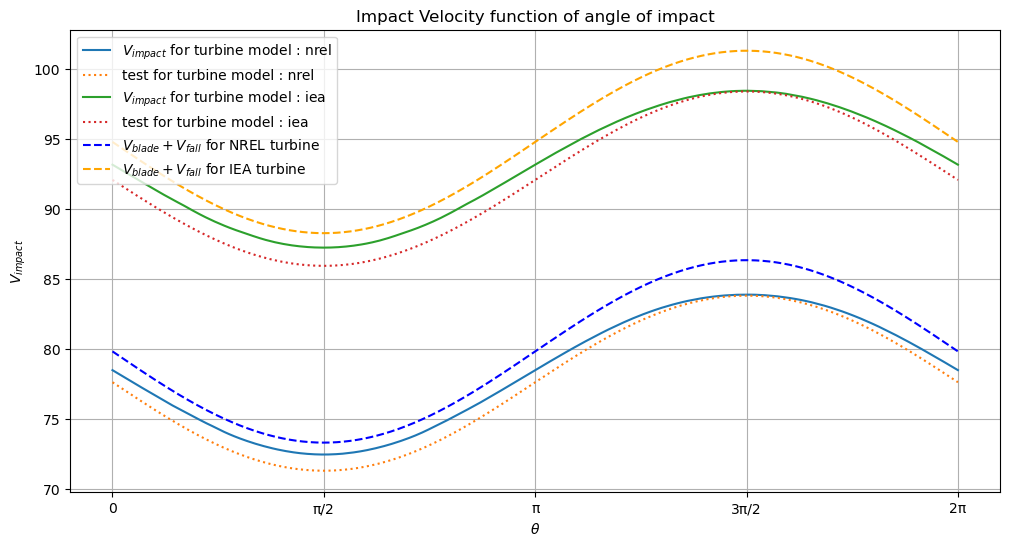

In [3]:
# Define the model parameters
cfg.R = 1e-3
theta_values = np.linspace(0, 2*np.pi, 1000)
# Create a figure for the plots
plt.figure(figsize=(12, 6))
# Iterate over the models
for m in ['nrel', 'iea']:
    results = []
    if m == 'nrel':
        cfg.V_blade = 80*0.998
    elif m == 'iea':
        cfg.V_blade = 95*0.998
    # Iterate over the position on the blade
    for theta in theta_values:
        # Calculate the fall speed
        cfg.vx0 = ut.v_terminal(cfg.R*1e3) * np.sin(theta)
        # Give the initial conditions as inputs (starting position, fall velocity, initial radius of the droplet, 0, initial distance between blade and droplet, blade speed)
        initial_conditions = [cfg.x0, cfg.vx0, cfg.R, cfg.va0, -1, cfg.vx_blade0]
        # Compute the impact speed
        V_impact = ut.impact_speed_vertical(initial_conditions, time_span = (0,0.1), time_steps = np.linspace(0, 0.1, 1000000), nose_radius = ut.rc(m,0.998), n = ut.n(m,0.998), initial_radius = cfg.R, blade_speed = cfg.V_blade)
        results.append(V_impact)
    
    test = [ut.get_impact_speed(cfg.V_blade - ut.v_terminal(cfg.R*1e3)*(1+np.sin(t)), cfg.R, ut.rc(m,0.998), ut.n(m,0.998)) for t in theta_values]
    # Plot the results
    plt.plot(theta_values, results, label='$V_{impact}$ for turbine model : ' +f'{m}')
    plt.plot(theta_values, test, linestyle='dotted', label='test for turbine model : ' +f'{m}')
    plt.xlabel('$\\theta$')
    plt.ylabel('$V_{impact}$')
    plt.xticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi],['0', 'π/2', 'π', '3π/2', '2π'])
    plt.legend()
    plt.title('Impact Velocity function of angle of impact')

results_without_model_80 = 80*0.998 - ut.v_terminal(cfg.R*1e3) * np.sin(theta_values)
results_without_model_90 = 95*0.998 - ut.v_terminal(cfg.R*1e3) * np.sin(theta_values)

plt.plot(theta_values, results_without_model_80, linestyle ='dashed', color='blue', label='$V_{blade} + V_{fall}$ for NREL turbine')

plt.plot(theta_values, results_without_model_90, linestyle ='dashed', color='orange', label='$V_{blade} + V_{fall}$ for IEA turbine')

plt.legend()
plt.grid()
plt.show()